#####Libraries
***

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 11.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# pip install TA-lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

--2022-10-21 07:58:50--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-10-21 07:58:50--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-10-21 07:58:50--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [3]:
import talib as ta
import matplotlib.pyplot as plt

#####Load Dataset
***

In [4]:
#φτιάχνω τη λίστα με τα assets μου -> 50 μετοχές 
#διόρθωση : θα βγάλω τυχαία άλλες 4 μετοχές μαζί με την OGN επειδή δεν έχει το ίδιο μέγεθος με τις άλλες 
#βγάζω OGN ,WRK,HST,CE,ACN
assets= ["ABBV","AEP","AIZ","ALLE","AMAT","AMP","AMZN","AVB","AVY",   
  "AXP","BDX","BF-B","BMY","BR","CARR","CDW","CHTR","CNC",   
  "CNP","COP","CTAS","CZR","DG","DPZ","DRE","DXC","META","FTV",   #change fb to meta 25/08/2022
  "GOOG","GPC","HIG","JPM","KR","PG","PPL","PRU",   
  "PYPL","RE","ROL","ROST","UNH","URI","V","VRSK","XOM"]
#άρα πρέπει να κατεβάσουμε όλα τα adj close για όλες τις τιμές όλων των μετοχών και να κάνουμε απόλυτο ranking και σε 5 κλασεις (targets)
r=pd.DataFrame(index=pdr.get_data_yahoo(assets[0],'2021-01-01','2022-04-01')['Adj Close'].index)
#παίρνω τιμές για ένα χρόνο 
for i in assets:
  # print('i metoxi me onoma:',i,'exei megethos',pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close'].count())
  temp= pdr.get_data_yahoo(i,'2021-01-01','2022-04-01')['Adj Close']
  temp=temp.dropna()
  r[i]=temp.values
#φτιάχνω ένα αντίγραφο με τις τιμές για να το έχω 
rd=pd.DataFrame(r)
rd1= rd.pct_change().shift(-1)
rd1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,0.010341,-0.001349,0.000303,0.001922,0.031426,-0.005848,0.010004,-0.002894,0.002173,0.005337,...,0.009686,0.012892,-0.008242,0.016475,0.000854,-0.013448,0.025778,-0.014925,-0.004486,0.048193
2021-01-05 00:00:00-05:00,-0.008639,0.007982,0.043889,0.022755,0.013728,0.057377,-0.024897,0.026827,0.038231,0.036993,...,0.059243,-0.034396,0.059276,0.016465,0.043697,0.041966,0.089060,-0.008811,-0.009457,0.025517
2021-01-06 00:00:00-05:00,0.010703,-0.026681,0.010076,0.026341,0.041065,0.012087,0.007577,-0.013628,0.031193,-0.007910,...,-0.004406,0.036194,0.007177,0.016705,-0.002208,0.016033,0.031690,0.005597,0.004549,0.007846
2021-01-07 00:00:00-05:00,0.005248,-0.008887,-0.005239,-0.003488,0.010575,0.007095,0.006496,0.008787,-0.038226,0.000986,...,-0.007990,0.031569,-0.009902,0.015684,0.003196,-0.004493,-0.017115,0.007670,-0.000348,0.011121
2021-01-08 00:00:00-05:00,0.016314,-0.005052,-0.005772,0.002917,0.025115,0.000149,-0.021519,-0.006690,0.029282,-0.005913,...,0.000991,-0.020457,-0.007197,0.002696,-0.012581,-0.007265,-0.010379,-0.011882,-0.015082,0.030356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25 00:00:00-04:00,0.003967,0.007951,-0.004391,0.010508,0.004378,-0.011219,0.025593,0.011123,0.002079,-0.003048,...,-0.006619,0.021185,-0.004147,0.018042,0.014852,0.000331,-0.000742,0.010713,0.017308,-0.028052
2022-03-28 00:00:00-04:00,0.001296,0.011065,-0.012849,0.013835,0.027459,0.003600,0.001920,0.033081,0.031124,0.006537,...,0.006663,0.043126,0.016153,0.021209,0.043578,-0.004813,0.004953,0.033293,0.015123,-0.005313
2022-03-29 00:00:00-04:00,0.009681,0.007397,0.004743,-0.014776,-0.039875,-0.005189,-0.017801,-0.018389,-0.011571,-0.006180,...,-0.004633,-0.022198,0.007072,0.008250,-0.030769,0.019756,-0.016457,-0.018280,0.010102,0.017118


In [5]:
rd2=rd1.rank(axis=1,method='first')
rd2=rd2.dropna()
rd2.astype(int)
jk=rd2.copy()
jk.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,34,14,15,21,41,9,33,12,22,25,...,32,36,6,38,17,5,40,3,11,44
2021-01-05 00:00:00-05:00,8,14,37,25,20,40,3,28,31,29,...,41,1,42,21,36,35,44,7,6,26
2021-01-06 00:00:00-05:00,25,2,23,36,44,28,20,3,40,8,...,9,43,19,30,11,29,41,18,16,21
2021-01-07 00:00:00-05:00,28,8,13,17,37,31,30,34,1,22,...,11,45,6,42,26,14,3,33,19,38
2021-01-08 00:00:00-05:00,39,23,22,29,42,26,5,20,43,21,...,27,7,16,28,10,15,13,11,9,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24 00:00:00-04:00,21,16,27,4,3,28,22,40,45,24,...,38,2,37,25,5,8,36,19,7,42
2022-03-25 00:00:00-04:00,22,27,9,31,23,4,45,36,19,13,...,8,42,11,41,38,18,16,32,40,2
2022-03-28 00:00:00-04:00,7,20,2,24,36,11,9,41,39,14,...,15,43,26,33,44,5,12,42,25,4


In [6]:
def rank_data(df1):
  for i in range(len(df1.index)):
    d=df1.loc[df1.index[i]]  #της κάθε μέρας d[1] δίνει μόνο τις τιμές 
    #print(d)
    d=d.sort_values()
    d[0:9]=1
    d[9:18]=2
    d[18:27]=3
    d[27:36]=4
    d[36:45]=5
    df1.loc[df1.index[i]]=d
    #print(df1.loc[df1.index[i]])
    #print(d)
  df1=df1.astype(int)
  return df1
r5=rd2.copy()
rd3=rank_data(r5)
rd3

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,4,2,2,3,5,1,4,2,3,3,...,4,4,1,5,2,1,5,1,2,5
2021-01-05 00:00:00-05:00,1,2,5,3,3,5,1,4,4,4,...,5,1,5,3,4,4,5,1,1,3
2021-01-06 00:00:00-05:00,3,1,3,4,5,4,3,1,5,1,...,1,5,3,4,2,4,5,2,2,3
2021-01-07 00:00:00-05:00,4,1,2,2,5,4,4,4,1,3,...,2,5,1,5,3,2,1,4,3,5
2021-01-08 00:00:00-05:00,5,3,3,4,5,3,1,3,5,3,...,3,1,2,4,2,2,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24 00:00:00-04:00,3,2,3,1,1,4,3,5,5,3,...,5,1,5,3,1,1,4,3,1,5
2022-03-25 00:00:00-04:00,3,3,1,4,3,1,5,4,3,2,...,1,5,2,5,5,2,2,4,5,1
2022-03-28 00:00:00-04:00,1,3,1,3,4,2,1,5,5,2,...,2,5,3,4,5,1,2,5,3,1


#####Features
All of them 
***


In [7]:
stock=dict()
for i in assets:
  #παίρνω δεδομένα για 15 μήνες περιπου->από Ιανουάριο 2021 μέχρι Μάρτιο 2022
  stock[i]=pdr.get_data_yahoo(i,'2021-01-01','2022-04-01') 
  # print(df)
  #από αυτές κρατάμε μόνο τις πρώτες 5 στήλες 
  stock[i]=stock[i].iloc[:,:5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
for j in assets:
    df=stock[j] #all the days we need so we can fix the columns 
    # print('to df ftanei mexri ',stock[j].iloc[:-61].tail(1))
    # print(df)
    #τώρα θα προσθέσουμε τις καινούριες στήλες με τα features μας 
    df['(open2-open1)/open2']= (df['Open'].shift(2)-df['Open'].shift(1))/df['Open'].shift(2)
    df['(high2-high1)/high2']= (df['High'].shift(2)-df['High'].shift(1))/df['High'].shift(2)
    df['(low2-low1)/low2']= (df['Low'].shift(2)-df['Low'].shift(1))/df['Low'].shift(2)
    df['(Adj Close2-Adj Close1)/Adj Close2']=(df['Adj Close'].shift(2)-df['Adj Close'].shift(1))/df['Adj Close'].shift(2)
    df['av_3']=df['Adj Close'].shift(1).rolling(window=3).mean().pct_change()
    df['av_6']=df['Adj Close'].shift(1).rolling(window=6).mean().pct_change()
    df['av_10']=df['Adj Close'].shift(1).rolling(window=10).mean().pct_change()
    df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    # df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    df['high1-low1/high1']=(df['High'].shift(1)-df['Low'].shift(1))/df['High'].shift(1)
    df['close1-open1/close1']=(df['Close'].shift(1)-df['Open'].shift(1))/df['Close'].shift(1)
    df['RSI']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=6)/100
    df['ADX'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=6)/100
    df['RSI_14']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=14)/100
    df['ADX_14'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=14)/100
    df['TRIX_14'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=14)
    df['TRIX_10'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=10)
    df['WILLR']= ta.WILLR(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1),timeperiod=14)/100
    df['std_dev']=df['Adj Close'].rolling(window=10).std().shift(1)
    df['dist_from_mean_10'] = (df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=10).mean()))
    df['dist_from_mean_6'] = df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=6).mean())
    df['MACD']= ta.MACD(df['Adj Close'].shift(1),fastperiod=5,slowperiod=14, signalperiod=8)[0]
    df['PPO']= ta.PPO(df['Adj Close'].shift(1), fastperiod= 5,slowperiod=14,matype=0)
    df['CMO_14']= ta.CMO(df['Adj Close'].shift(1),timeperiod=14)
    df = df.iloc[1: , :]
    df['absolute rank']= jk[j].astype(int).shift(1)
    df['Rank']= rd3[j]
    df1=df.dropna()
    stock[j]=df1.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
stock

{'ABBV':                                  Open        High         Low       Close  \
 Date                                                                        
 2021-03-04 00:00:00-05:00  106.500000  107.750000  104.949997  105.650002   
 2021-03-05 00:00:00-05:00  106.010002  106.989998  104.070000  106.699997   
 2021-03-08 00:00:00-05:00  106.849998  108.160004  105.800003  106.110001   
 2021-03-09 00:00:00-05:00  106.480003  108.690002  106.440002  106.790001   
 2021-03-10 00:00:00-05:00  107.389999  108.360001  107.050003  108.000000   
 ...                               ...         ...         ...         ...   
 2022-03-24 00:00:00-04:00  159.220001  160.729996  158.850006  160.279999   
 2022-03-25 00:00:00-04:00  160.550003  161.979996  160.229996  161.330002   
 2022-03-28 00:00:00-04:00  160.610001  162.029999  159.529999  161.970001   
 2022-03-29 00:00:00-04:00  162.990005  163.279999  161.289993  162.179993   
 2022-03-30 00:00:00-04:00  161.720001  164.350006  161.

#####Functions
***

In [10]:
def RPS_calculation(hist_data, submission, asset_no=44):
    # print('check')
    if hist_data.shape[0]<=asset_no:
        return np.nan    
    # print('check')
    asset_id = pd.unique(hist_data.symbol)
    
    for i in range(len(pd.unique(hist_data.date))):
        if len(hist_data[hist_data.date == pd.unique(hist_data.date)[i]])<len(asset_id):
            for asset in [x for x in asset_id if x not in hist_data[hist_data.date == pd.unique(hist_data.date)[i]].symbol.values]:
                right_price = hist_data[hist_data.symbol==asset].sort_values(by='date')
                right_price = right_price[right_price.date <= pd.unique(hist_data.date)[i]]
                right_price = right_price.price.iloc[-1]
                hist_data = hist_data.append({'date' : pd.unique(hist_data.date)[i],
                                               'symbol' : asset,
                                               'price' : right_price}, ignore_index=True)

    #Compute percentage returns
    asset_id = sorted(asset_id) 

    #Compute percentage returns
    returns = pd.DataFrame(columns = ["ID", "Return"])
    
    min_date = min(hist_data.date)
    max_date = max(hist_data.date)
    
    for i in range(0,len(asset_id)):
        temp = hist_data.loc[hist_data.symbol==asset_id[i]]
        
        open_price = float(temp.loc[temp.date==min_date].price)
        close_price = float(temp.loc[temp.date==max_date].price)
        
        returns = returns.append({'ID': temp.symbol.iloc[0], 
                                'Return': (close_price - open_price)/open_price}, ignore_index=True)

    #Define the relevant position of each asset
    ranking = pd.DataFrame(columns=["ID", "Position", "Return"])
    ranking.ID = list(asset_id)
    ranking.Return = returns.Return
    ranking.Position = ranking.Return.rank(method = 'min')

    #Handle Ties
    Series_per_position = pd.DataFrame(columns=["Position","Series", "Rank", "Rank1", "Rank2","Rank3", "Rank4", "Rank5"])
    Series_per_position.Position = list(pd.unique(ranking.Position.sort_values(ascending=True)))
    temp = ranking.Position.value_counts()
    temp = pd.DataFrame(zip(temp.index, temp), columns = ["Rank", "Occurencies"])
    temp = temp.sort_values(by = ["Rank"],ascending=True)
    Series_per_position.Series = list(temp.Occurencies)
    Series_per_position

    total_ranks = Series_per_position.Position.values[-1]
    for i in range(0,Series_per_position.shape[0]):
    
        start_p = Series_per_position.Position[i]
        end_p = Series_per_position.Position[i] + Series_per_position.Series[i]
        temp = pd.DataFrame(columns = ["Position","Rank", "Rank1", "Rank2", "Rank3", "Rank4","Rank5"])
        temp.Position = list(range(int(start_p),int(end_p)))

        if(temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank=1)
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank1=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank=2)
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank2=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank=3)
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank3=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank=4)
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank4=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank=5)
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank5=1.0)
        temp = temp.fillna(0)
        Series_per_position.iloc[i,2:Series_per_position.shape[1]] = temp.mean(axis = 0).iloc[1:temp.shape[1]]

    Series_per_position = Series_per_position.drop('Series', axis = 1)
    ranking = pd.merge(ranking,Series_per_position, on = "Position")
    ranking = ranking[["ID", "Return", "Position", "Rank", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5"]]
    ranking = ranking.sort_values(["Position"])
    # print(ranking)
    #Evaluate submission
    rps_sub = []
    #for aid in list((pd.unique(ranking.ID))):
    for aid in asset_id:

        target = np.cumsum(ranking.loc[ranking.ID==aid].iloc[:,4:9].values).tolist()
        frc = np.cumsum(submission.loc[submission.ID==aid].iloc[:,1:6].values).tolist()
        rps_sub.append(np.mean([(a - b)**2 for a, b in zip(target, frc)]))
    submission["RPS"] = rps_sub
    
    output = {'RPS' : np.mean(rps_sub),
              'details' : submission}
    
    return(output)

In [11]:
def create_historical(prob):
  prob=prob.rename_axis("symbol", axis="columns")
  prob=prob.T
  prob['date']=prob.columns.date[0]
  prob.columns = ['price', 'date']
  prob=prob.reset_index()
  prob=prob[['symbol','date','price']]
  return prob

In [12]:
def predictions(model,assets,stock,k):
  prob=dict()

  for j in assets:
      tmp=[]
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:k]
      # print(X) #it has all the days
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      # print(X_train)
      Y_train= y.iloc[:-60]
      # print(Y_train)
      model.fit(X_train,Y_train)
      #now each day we will use the models to predict 
      for i in range(59,0,-1): #from 4/01 and later -->predictions
        X_validation=X.iloc[-(i+1):-i] 
        # print(X_validation)
        Y_validation= y.iloc[-(i+1):-i]
        # print(Y_validation.index) 
        probability= model.predict_proba(X_validation)
        # print(probability[0])
        tmp.append(probability[0])
      X_validation=X.tail(1) 
      # print(X_validation)
      Y_validation= y.tail(1)
      print(Y_validation.index) 
      probability= model.predict_proba(X_validation)
      print(probability[0])
      tmp.append(probability[0])
      prob[j]=tmp
  return prob

In [77]:
def RPS_data(prob_final,rd):
  RPS=pd.DataFrame()

  # RPS=RPS.drop('date',axis=1)
  # print(RPS.index[2])
  for k in range(len(prob_final.index)-1): #for everyday of a stock->index
    prob=pd.DataFrame()
    prob1=pd.DataFrame()
    predic=pd.DataFrame()
    print('ok')
    print(prob_final['date'][k]!=prob_final['date'].tail(1))
    if(prob_final['date'][k]!=prob_final['date'].tail(1).index): #if it's not for the last day 
      print('mpika')
      #for historical data of two days 
      prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      prob1=rd.loc[ (rd.index.date==prob_final['date'][k+1])]
      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)
      # print(RPS[RPS.index==k])

      
    else:
      #for the last day
      prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      prob1=rd.loc[ (rd.index.date==rd.index.date[-1])]
      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      # print(hist_data)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)              
  return RPS

In [14]:
def create_RPS(prob_final,RPS):
  d=prob_final['date']
  name=prob_final.columns[:-1]
  # print(np.split(name.values,len(name)))
  # print(d.values)
  RPS['date']=d.values
  RPS=RPS.set_index('date')
  RPS.columns=assets
  return RPS

##### Gradient Boosting model with all the features and no tuning of hyperparameters.
***

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
#create a baseline model with no tuning -default 
baseline= GradientBoostingClassifier()

In [16]:
#---predictions---#
prob1=predictions(baseline,assets,stock,29)

DatetimeIndex(['2022-03-30 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[0.06951327 0.33857964 0.11126023 0.30804458 0.17260229]
DatetimeIndex(['2022-03-30 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[0.39693013 0.09378435 0.06837418 0.4172127  0.02369863]
DatetimeIndex(['2022-03-30 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[0.0781047  0.19334913 0.53772062 0.12251711 0.06830843]
DatetimeIndex(['2022-03-30 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[0.15176297 0.53383456 0.01988715 0.10743495 0.18708037]
DatetimeIndex(['2022-03-30 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[0.03616595 0.04004008 0.02478252 0.06564426 0.83336719]
DatetimeIndex(['2022-03-30 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
[0.14252892 0.34094789 0.13399242 0.3260672  0.05

In [17]:
#---probabilities---#
prob1['date']=stock['ABBV'].iloc[-60:].index
prob1_final=pd.DataFrame.from_dict(prob1)
prob1_final.set_index('date')

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,"[0.2935324232026816, 0.44185420890400473, 0.06...","[0.11069229440009486, 0.04849960288337155, 0.6...","[0.3379957195409143, 0.15156605024994618, 0.12...","[0.3072294917568632, 0.4216414818030336, 0.033...","[0.04204426954540978, 0.06179903652500673, 0.0...","[0.07826826893439134, 0.17795651558163872, 0.2...","[0.07428721456783192, 0.022333051222569, 0.047...","[0.3477625679891218, 0.06754071176256084, 0.21...","[0.579846734645859, 0.019218463211844387, 0.07...","[0.0010583264047458823, 0.02314292844029951, 0...",...,"[0.13611736192235466, 0.5589123274282414, 0.02...","[0.2638521773472337, 0.14170866895809062, 0.01...","[0.03514921442180873, 0.7361116442127864, 0.14...","[0.3714380043388062, 0.12811886947781206, 0.04...","[0.17804900087494982, 0.22553521946952484, 0.0...","[0.03532325012173637, 0.6489735389782401, 0.23...","[0.29168654317111414, 0.3395322107703418, 0.07...","[0.16060809005894908, 0.1489855654673953, 0.62...","[0.023737425237239755, 0.8574267090353055, 0.0...","[0.07003609402875392, 0.08108226630594619, 0.0..."
2022-01-05 00:00:00-05:00,"[0.05374338485791466, 0.7884652140963535, 0.06...","[0.05229898403473013, 0.050607995319783154, 0....","[0.07926458353459614, 0.1271274857519376, 0.02...","[0.5716579398750705, 0.04351138531779395, 0.06...","[0.047816665562565155, 0.23522934354429756, 0....","[0.0029054162217884236, 0.2391013764264265, 0....","[0.8492589250963486, 0.027231131243003418, 0.0...","[0.24232434330820543, 0.1355112640690801, 0.04...","[0.305243134911422, 0.05820365995305319, 0.284...","[0.011654817073324131, 0.03946496268284961, 0....",...,"[0.0648986726432798, 0.24365372535824376, 0.30...","[0.1781700350194067, 0.029503278301971476, 0.0...","[0.01508818185581871, 0.3846609099824376, 0.52...","[0.004716637534212001, 0.011602295107394078, 0...","[0.06916517057396622, 0.170004302230424, 0.014...","[0.10502836100273207, 0.13621815987633304, 0.5...","[0.05138414037629157, 0.022150313181088732, 0....","[0.032018924443735435, 0.2643344234120263, 0.6...","[0.10511322913214666, 0.012372010388125444, 0....","[0.23861116659465595, 0.46796906156673856, 0.0..."
2022-01-06 00:00:00-05:00,"[0.09937915227803984, 0.7478253084917731, 0.04...","[0.7117072969125018, 0.052148770959452535, 0.1...","[0.026609309455297936, 0.4839515014312285, 0.0...","[0.1652214870697901, 0.6432709804955664, 0.063...","[0.8079026015808007, 0.08621601665583649, 0.01...","[0.4622549451950431, 0.11045974972180116, 0.07...","[0.20546696047005628, 0.07491536586099357, 0.5...","[0.08797699875002339, 0.05351851282969368, 0.2...","[0.14449315849319044, 0.03777569388628927, 0.4...","[0.40327171055641836, 0.05050316351555794, 0.0...",...,"[0.32178976551735633, 0.27914451135320256, 0.0...","[0.1683226742611493, 0.011200752021148761, 0.0...","[0.16447243242608559, 0.6634305921814746, 0.03...","[0.17439400557796453, 0.43885339318268685, 0.3...","[0.05989953219188921, 0.07325524738422312, 0.0...","[0.1447782633027616, 0.4416046071834303, 0.299...","[0.7014089100162966, 0.04133822309430817, 0.12...","[0.08986751884614828, 0.09491594397508055, 0.6...","[0.0613539978544987, 0.31848072920054243, 0.08...","[0.05575631131879679, 0.7535533890597885, 0.00..."
2022-01-07 00:00:00-05:00,"[0.11059248505057388, 0.47213687713416, 0.0831...","[0.26207273710458795, 0.09452151031544367, 0.3...","[0.01848838648883229, 0.3264275105930083, 0.01...","[0.03071083070137392, 0.06034029619072052, 0.0...","[0.21266465069476378, 0.0183657780223249, 0.00...","[0.11303892635866465, 0.19950538056725478, 0.0...","[0.35461804472385994, 0.05494038811430525, 0.1...","[0.07379209031201889, 0.07531215032127751, 0.2...","[0.03241546979823207, 0.7664708617162402, 0.03...","[0.07998235326003048, 0.1832807841342535, 0.53...",...,"[0.08354911367602816, 0.37598143387813565, 0.0...","[0.1220358386493887, 0.08629245583235697, 0.00...","[0.12133351847576657

In [83]:
prob1_final.index
flag = prob1_final['date'][58]!=prob1_final['date'].tail(1).index
print(flag)
# prob1_final['date'].tail(1)
print(range(len(prob1_final.index)-1))
prob1_final['date']
RPS1

[ True]
range(0, 59)


,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.423328,0.297758,0.158584,0.055163,0.625384,0.101536,0.250186,0.085706,0.248885,0.145898,...,0.041843,0.209498,0.121195,0.181497,0.283379,0.263996,0.147721,0.025446,0.195348,0.159170
1,0.008387,0.162774,0.249857,0.098580,0.053687,0.024058,0.149083,0.123051,0.091601,0.003551,...,0.109538,0.141809,0.389885,0.195944,0.306628,0.281648,0.246439,0.100422,0.324171,0.317347
2,0.148054,0.544956,0.226286,0.016333,0.012601,0.203055,0.034310,0.230925,0.041719,0.130468,...,0.291846,0.409977,0.459013,0.253461,0.557675,0.041053,0.037316,0.143484,0.310833,0.271818
3,0.273241,0.058565,0.401058,0.305272,0.354254,0.110150,0.141162,0.083523,0.204964,0.028472,...,0.107555,0.403821,0.164252,0.075023,0.334654,0.364310,0.207248,0.307873,0.259652,0.105843
4,0.079620,0.002952,0.230805,0.049285,0.049356,0.290082,0.309366,0.156165,0.323867,0.093913,...,0.180335,0.186601,0.250630,0.162673,0.013415,0.135829,0.258649,0.165136,0.096617,0.296246
5,0.099303,0.542893,0.339488,0.112673,0.036093,0.088308,0.082074,0.030185,0.423578,0.100040,...,0.178036,0.238456,0.229403,0.018743,0.605418,0.417260,0.500754,0.040924,0.372771,0.334516
6,0.434329,0.336587,0.360430,0.121335,0.120648,0.053444,0.092318,0.080681,0.107482,0.073104,...,0.234772,0.196573,0.432663,0.083041,0.151922,0.384323,0.177061,0.086924,0.253042,0.164675
7,0.167371,0.186189,0.115047,0.055677,0.068272,0.284851,0.282267,0.034944,0.110779,0.034206,...,0.262310,0.132603,0.368258,0.214350,0.247074,0.174835,0.339359,0.128192,0.424361,0.278923
8,0.588816,0.242991,0.053832,0.124483,0.184965,0.327772,0.156174,0.026764,0.094526,0.125312,...,0.019122,0.304904,0.391172,0.074157,0.609911,0.269858,0.183347,0.561075,0.266158,0.576036
9,0.065002,0.168398,0.123578,0.127731,0.500506,0.311580,0.024206,0.123195,0.125376,0.157254,...,0.268558,0.293525,0.079994,0.216599,0.014589,0.103867,0.445967,0.050646,0.252336,0.183605


In [78]:
RPS1= RPS_data(prob1_final,rd)
RPS1= create_RPS(prob1_final,RPS1)
RPS1

ok
59    True
Name: date, dtype: bool
mpika


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  app.launch_new_instance()


ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype: bool
mpika
ok
59    True
Name: date, dtype:

ValueError: ignored

In [84]:
print(RPS1.mean(axis=1).mean())

0.21111401533225133


#####Feature importances for the baseline
***

{'(open2-open1)/open2': 0.03799692204617426, '(high2-high1)/high2': 0.05819192376638704, '(low2-low1)/low2': 0.05961243326321257, '(Adj Close2-Adj Close1)/Adj Close2': 0.03345463865794764, 'av_3': 0.10014072430584167, 'av_6': 0.03150791726102251, 'av_10': 0.04057470722535382, 'av_14': 0.05507973346851353, 'high1-low1/high1': 0.0407205455312062, 'close1-open1/close1': 0.05394777717649281, 'RSI': 0.018925498827110022, 'ADX': 0.05255727681047544, 'RSI_14': 0.006200565259623163, 'ADX_14': 0.046821029827582385, 'TRIX_14': 0.05053282224751006, 'TRIX_10': 0.046546650764837605, 'WILLR': 0.058049576423265685, 'std_dev': 0.043390351749264484, 'dist_from_mean_10': 0.02240692442603614, 'dist_from_mean_6': 0.01962940608709128, 'MACD': 0.019950637284538043, 'PPO': 0.03259198122230361, 'CMO_14': 0.012110034549762883, 'absolute rank': 0.05905992181844714}
{'(open2-open1)/open2': 0.03799692204617426, '(high2-high1)/high2': 0.05819192376638704, '(low2-low1)/low2': 0.05961243326321257, '(Adj Close2-Adj C

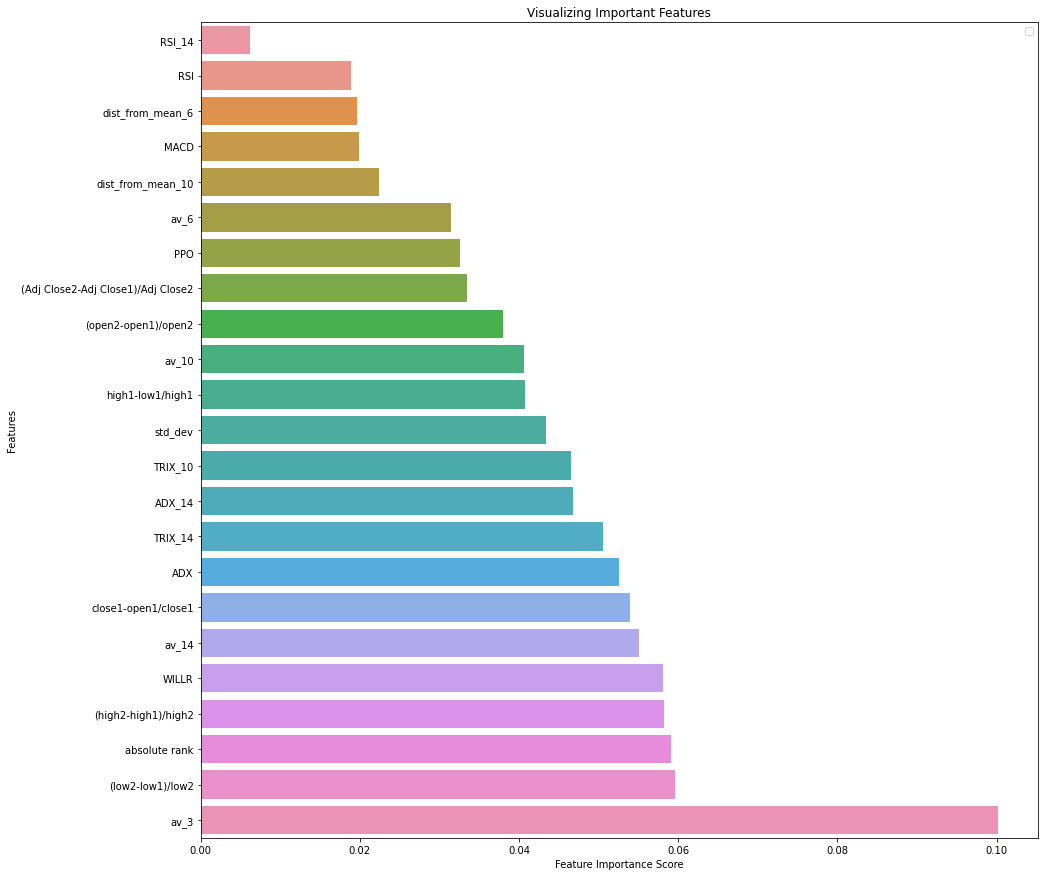

In [90]:
#---feature importances for the baseline---#
feat_import = baseline.feature_importances_

# summarize feature importance
d=dict()
X=df1.columns[5:29]
# X = X.drop(['CMO_14'])
for i,v in enumerate(feat_import):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  d[X[i]]= v
features=X.values
print(d)
d.pop('CMO_14')
print(d)
# ax=plt.plot(features,importance1)
# plt.figure(figsize=(15,15))
# plt.barh(list(d.keys()), list(d.values()))
# plt.title("Random Forest Classifier")
plt.figure(figsize=(15,15))
df=pd.DataFrame({"Feature_Importance":list(d.values()) , "Features": list(d.keys())})
sns.barplot(x='Feature_Importance', y= "Features",data = df,order= df.sort_values('Feature_Importance').Features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#####Tuning hyperparameters with Grid Search
***

The most important are number of trees, tree depth and the learning rate meaning ---> learning_rate,n_estimators,max_depth


In [ ]:
from sklearn.model_selection import GridSearchCV

######5-folds

In [ ]:
estimators= [int(x) for x in np.arange(start = 100, stop = 1700, step=100)]
learning=[0.001,0.005,0.01,0.05,0.1,0.15]
test1 = {'n_estimators':estimators,'learning_rate':learning}

model1=GradientBoostingClassifier()
tuning1=GridSearchCV(estimator =model1, param_grid=test1,cv=5,scoring='accuracy') 

for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      tuning1.fit(X_train,Y_train)



In [ ]:
tuning1.best_params_

{'learning_rate': 0.1, 'n_estimators': 1200}

In [ ]:
#--- max depth---#
test2= {'max_depth':[2,3,4,5,6,7]}
model2=GradientBoostingClassifier(n_estimators=1200,learning_rate=0.1)
tuning2=GridSearchCV(estimator =model2, param_grid=test2,cv=5,scoring='accuracy') 
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      tuning2.fit(X_train,Y_train)
      print(j)

In [ ]:
tuning2.best_params_

{'max_depth': 4}

#####Tuning hyperparameters with Randomized Search Cross Validation.
***
(due to limited time-quicker results)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 100)]
# Number of features to consider at every split
max_depth = [2,3,4,5,6,7]
learning=[0.001,0.005,0.01,0.05,0.1,0.15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth ,
               'learning_rate': learning}

3-fold

In [ ]:
model_for_tuning1=GradientBoostingClassifier()
model_for_tuning_random1 = RandomizedSearchCV(estimator = model_for_tuning1, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model_for_tuning_random1.fit(X_train,Y_train)
model_for_tuning_random1.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

{'n_estimators': 1429, 'max_depth': 2, 'learning_rate': 0.01}

5-fold

In [ ]:
model_for_tuning2=GradientBoostingClassifier()
model_for_tuning_random2 = RandomizedSearchCV(estimator = model_for_tuning2, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model_for_tuning_random2.fit(X_train,Y_train)
model_for_tuning_random2.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

{'n_estimators': 948, 'max_depth': 4, 'learning_rate': 0.005}

##### Gradient Boosting after tuning hyperparameters
***

######With Grid Search

In [ ]:
#---from 5-fold---#
model3=GradientBoostingClassifier(n_estimators=1200,learning_rate=0.1,max_depth=4)
#---predictions---#
prob3= predictions(model3,assets,stock,29)
#---probabilities---#
prob3['date']=stock['ABBV'].iloc[-60:].index
prob3_final=pd.DataFrame.from_dict(prob3)
prob3_final.set_index('date')

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.02961059 0.89970821 0.00171184 0.06663681 0.00233255]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[5.69938328e-02 8.09828621e-02 4.94031422e-04 1.05055497e-01
 7.56473777e-01]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.0063337  0.15702611 0.69786832 0.00795456 0.1308173 ]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[7.30458933e-01 2.26149914e-01 9.18979032e-03 5.14997231e-04
 3.36863658e-02]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.00082842 0.01171179 0.20574444 0.00446949 0.77724586]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.00118327 0.72877832 0.13497359 0.08905838 0.04600644]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[2.07211329e-07 9.84935624e-01 1.50637912e-02 3.74101674e-07
 3.328940

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.25881687711450463, 0.7121083111697986, 0.00...","[0.002754288012859596, 4.552945049058644e-05, ...","[0.27026527869064504, 0.0020986888487968896, 0...","[0.047275581664720775, 0.7613550769900829, 0.0...","[6.562503542815445e-05, 8.870892961230153e-05,...","[0.012351741646349333, 0.512146443085766, 0.26...","[5.8394670541258915e-05, 4.403026565698601e-06...","[0.045351640002312406, 0.0012517616694003911, ...","[0.994680741564325, 6.213798333626158e-07, 2.3...","[2.5402142019531806e-09, 1.0660167942905638e-0...",...,"[0.01319565635848027, 0.5192952029095489, 2.48...","[0.02658494508776949, 0.022030320066735103, 8....","[9.777798209781766e-06, 0.996921925318437, 0.0...","[0.003155686559815815, 0.0018661326951783636, ...","[0.0037554711714620857, 0.049446650848225214, ...","[1.050999700367801e-07, 0.9998394277816376, 0....","[0.07340685100656018, 0.28637976405813925, 3.6...","[0.002770157311703681, 0.0009602740130187754, ...","[0.010608472132907753, 0.9893144603447245, 1.1...","[0.0344010043243329, 0.1686354946500085, 0.000..."
2022-01-05,"[1.5624228982212076e-05, 0.9997867984354603, 4...","[0.0013115247998743273, 6.0993033121992234e-05...","[0.0030552561014532474, 0.006643974022586507, ...","[0.9905724189482177, 1.0185164310641134e-05, 0...","[0.00018808816865911247, 0.014635633702882187,...","[3.750152762964077e-12, 0.004100099823742408, ...","[0.9902067604512234, 0.0001895654183200958, 0....","[0.003757366012117317, 0.012850253549244383, 0...","[0.05815425697696628, 1.475245801287749e-05, 0...","[1.1181674089411662e-05, 0.0010895629797328607...",...,"[0.03742184728647194, 0.14985150233295946, 0.3...","[0.07449782667237406, 0.0019028814131278034, 2...","[2.5815226304292186e-05, 0.907678652668017, 0....","[2.72553552406981e-09, 8.493883310786349e-08, ...","[0.0082495479905293, 0.3175888843988433, 4.857...","[0.01193348909075393, 0.008368525468707422, 0....","[0.000623141806560602, 0.00043067102243623075,...","[0.00313078711339782, 7.550759129576025e-05, 0...","[0.041236165842584195, 4.346015992035768e-06, ...","[0.009549552225012248, 0.5411653834800508, 2.4..."
2022-01-06,"[0.0004743617884440622, 0.9991792963025794, 6....","[0.9602073864712247, 0.0008452218752679087, 0....","[5.135699679671991e-05, 0.14189607332534215, 0...","[0.06137011037418341, 0.8884752429102581, 0.04...","[0.9999932249489911, 4.329510223781878e-06, 1....","[0.9903046268450111, 0.004349241811372684, 0.0...","[0.1013214526830177, 0.04789162392989089, 0.85...","[0.007641893265399109, 0.060040467986277955, 0...","[0.013926402455838083, 0.00030384316401440285,...","[0.9982407365335487, 1.475585683773972e-07, 3....",...,"[0.9941759556292527, 0.005088735529558588, 6.4...","[5.448546572048114e-06, 6.164974463268668e-08,...","[0.005169380391329346, 0.9936893442388811, 3.6...","[0.004198546508487317, 0.22125255953769848, 0....","[0.00010877050431092741, 0.0013712930879676906...","[0.10529646357359959, 0.30851297751335194, 0.0...","[0.9689021692272927, 4.4893451498722183e-05, 0...","[0.0052150453681888385, 0.002227193257635771, ...","[1.2260181363834032e-05, 0.9814080787005125, 0...","[0.00012213458079987202, 0.9998007636815933, 8..."
2022-01-07,"[0.00036787843924914886, 0.8255809313088973, 0...","[0.0200760551300238, 0.0006701740598319639, 0....","[2.3815786169460085e-06, 0.008798319680647215,...","[0.0013833499270873414, 5.577341964053149e-05,...","[0.03355292303673337, 3.1498557599278503e-06, ...","[0.01268356128140653, 0.04052223407355196, 3.0...","[0.989163260301864, 2.18964027759522e-05, 0.00...","[0.003621443362716095, 0.10194720078639784, 0....","[1.1861992973425216e-05, 0.9984045709858689, 5...","[0.2946159099153343, 0.06795627531492128, 0.53...",...,"[0.00040403605853560576, 0.752273198642012, 0....","[0.007104807162040617, 0.5295831585598929, 4.7...","[6.911450387736303e-05, 0.22122499758685726, 0...","[0.0004883615763065757, 0.00

In [ ]:
RPS3= RPS_data(prob3_final,rd)
RPS3= create_RPS(prob3_final,RPS3)
RPS3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,5.905784e-01,3.993767e-01,1.370254e-01,2.178115e-02,7.986160e-01,1.877825e-01,3.977208e-01,1.817218e-01,5.936493e-01,1.998685e-01,...,8.779048e-02,5.425794e-01,1.987746e-01,5.947089e-01,7.347652e-01,3.999357e-01,3.356607e-01,4.433321e-06,1.957791e-01,7.260156e-02
2022-01-05,1.688647e-08,1.994517e-01,3.923080e-01,4.201592e-05,1.319059e-04,6.724327e-06,1.961204e-01,3.387257e-01,2.331327e-01,9.382035e-07,...,1.062425e-01,2.018451e-01,5.621214e-01,2.000000e-01,2.384231e-01,3.873256e-01,2.459692e-01,1.987215e-01,3.676896e-01,1.819912e-01
2022-01-06,1.998615e-01,7.623029e-01,1.253525e-02,1.271115e-03,1.227483e-11,5.920026e-01,6.506164e-03,2.595140e-01,6.364590e-03,5.979032e-01,...,7.968021e-01,5.999934e-01,5.986712e-01,2.101654e-01,7.892214e-01,1.393412e-01,7.180981e-04,2.103949e-01,2.001307e-01,3.999417e-01
2022-01-07,4.096397e-01,1.847576e-04,6.059309e-01,3.898993e-01,5.606329e-01,1.798812e-01,1.957387e-01,1.166038e-01,1.999967e-01,4.739002e-02,...,1.354231e-01,2.830844e-01,1.938882e-01,1.863267e-01,6.889273e-01,6.240599e-01,5.998755e-01,3.999005e-01,3.999919e-01,1.999750e-01
2022-01-10,4.877058e-01,3.159845e-05,1.809894e-01,3.202180e-06,1.498788e-08,5.753710e-01,7.977887e-01,1.999951e-01,3.975791e-01,1.092073e-01,...,2.000000e-01,1.999463e-01,3.934835e-01,1.311790e-01,9.038172e-11,2.674020e-01,2.739034e-01,3.007380e-01,1.889482e-01,5.643773e-01
2022-01-11,1.995132e-01,5.996751e-01,2.101095e-01,7.539032e-05,1.151408e-03,3.848480e-01,5.712990e-02,3.555275e-06,5.999749e-01,1.947932e-01,...,2.552141e-01,2.145737e-01,2.009215e-01,7.630115e-06,7.998629e-01,8.917780e-02,6.531696e-01,4.895892e-02,3.100950e-01,1.874074e-01
2022-01-12,5.991700e-01,3.998705e-01,3.315602e-01,1.944698e-01,1.990261e-01,1.202597e-01,1.999158e-01,3.020674e-06,3.342448e-01,6.200648e-02,...,3.961636e-01,1.999999e-01,3.988661e-01,9.979536e-02,3.726780e-01,5.999583e-01,6.900085e-01,7.185580e-02,1.687243e-01,2.000000e-01
2022-01-13,1.999557e-01,1.999862e-01,1.974767e-01,6.643899e-05,1.947877e-03,3.390291e-01,3.954158e-01,1.048561e-01,1.983883e-01,4.808919e-06,...,6.692883e-01,1.978776e-01,4.000089e-01,1.998591e-01,6.805005e-01,1.999999e-01,4.724381e-01,1.001753e-01,7.902871e-01,7.225487e-01
2022-01-14,7.742223e-01,5.849422e-01,7.876729e-09,3.391861e-01,4.642629e-03,4.348663e-01,1.997528e-01,1.239897e-06,1.560238e-01,1.507036e-01,...,3.372256e-10,2.533339e-01,3.999983e-01,1.314555e-01,6.735828e-01,3.966034e-01,2.722886e-01,7.995667e-01,5.996413e-01,6.000000e-01


In [ ]:
print(RPS3.mean(axis=1).mean())

0.2866665293394589


######With Randomized Search CV results

In [ ]:
#---from 3-fold---#
model_RCV1=GradientBoostingClassifier(n_estimators=1300,learning_rate=0.001,max_depth=2)
#---predictions---#
prob_RCV1= predictions(model_RCV1,assets,stock,29)
#---probabilities---#
prob_RCV1['date']=stock['ABBV'].iloc[-60:].index
prob_RCV1_final=pd.DataFrame.from_dict(prob_RCV1)
prob_RCV1_final.set_index('date')

RPS_RCV1= RPS_data(prob_RCV1_final,rd)
RPS_RCV1= create_RPS(prob_RCV1_final,RPS_RCV1)
RPS_RCV1
print(RPS_RCV1.mean(axis=1).mean())

            (open2-open1)/open2  (high2-high1)/high2  (low2-low1)/low2  \
Date                                                                     
2021-03-04             0.018282             0.020479          0.021798   
2021-03-05             0.003369            -0.005693          0.004836   
2021-03-08             0.004601             0.007053          0.008385   
2021-03-09            -0.007924            -0.010936         -0.016623   
2021-03-10             0.003463            -0.004900         -0.006049   
...                         ...                  ...               ...   
2022-03-24             0.000250            -0.005490         -0.002152   
2022-03-25             0.004937             0.002792         -0.003094   
2022-03-28            -0.008353            -0.007777         -0.008687   
2022-03-29            -0.000374            -0.000309          0.004369   
2022-03-30            -0.014819            -0.007715         -0.011032   

            (Adj Close2-Adj Close1)/A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.16622541121267026


In [ ]:
#---from 5-fold---#
model_RCV2=GradientBoostingClassifier(n_estimators=600,learning_rate=0.005,max_depth=2)
#---predictions---#
prob_RCV2= predictions(model_RCV2,assets,stock,29)
#---probabilities---#
prob_RCV2['date']=stock['ABBV'].iloc[-60:].index
prob_RCV2_final=pd.DataFrame.from_dict(prob_RCV2)
prob_RCV2_final.set_index('date')

RPS_RCV2= RPS_data(prob_RCV2_final,rd)
RPS_RCV2= create_RPS(prob_RCV2_final,RPS_RCV2)
RPS_RCV2
print(RPS_RCV2.mean(axis=1).mean())

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.11801904 0.26084416 0.13820323 0.24633351 0.23660006]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.2537298  0.1276227  0.1492818  0.35988999 0.10947571]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.09607877 0.30010235 0.24494137 0.27537212 0.08350539]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.25221371 0.31367354 0.07478416 0.20709224 0.15223635]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.15201549 0.0785568  0.07938649 0.18508525 0.50495597]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.14732763 0.27991444 0.29194896 0.21044038 0.07036859]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.03571671 0.87356723 0.03032547 0.04014722 0.02024336]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.17463728518941138


#####Feature importances
***
For the baseline with no tuning

Βρήκαμε τα importances  για το baseline  και με βάση αυτά ελέγχουμε αν βελτιώνεται το μοντέλο με τη σειρά.

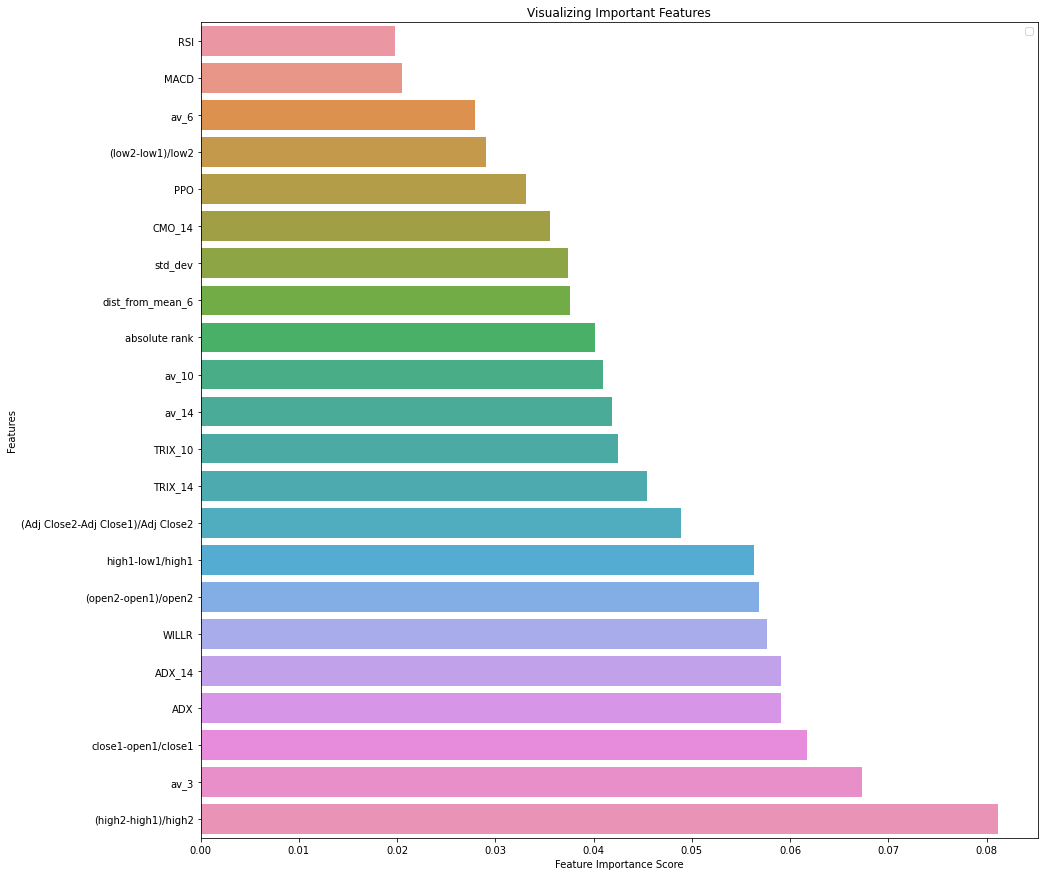

In [ ]:
model4=GradientBoostingClassifier()
for j in assets:
    tmp1=[]
    df1=stock[j] #all the days we need so we can fix the columns 
    X= df1.iloc[:,5:29]
    X=X.drop(['RSI_14','dist_from_mean_10'],axis=1)
    # print(X) #it has all the days
    y= df1['Rank']
    model4.fit(X,y)
# get importance
importance4 = model4.feature_importances_

# summarize feature importance
d4=dict()
for i,v in enumerate(importance4):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  d4[X.columns[i]]= v
features=X.columns.values
# ax=plt.plot(features,importance1)
# plt.figure(figsize=(15,15))
# plt.barh(list(d8.keys()), list(d8.values()))
# plt.title("Random Forest Classifier")
plt.figure(figsize=(15,15))
df=pd.DataFrame({"Feature_Importance":list(d4.values()) , "Features": list(d4.keys())})
sns.barplot(x='Feature_Importance', y= "Features",data = df,order= df.sort_values('Feature_Importance').Features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
stock6=stock.copy()
for j in assets:
  stock6[j]=stock[j].drop(['absolute rank','CMO_14'],axis=1)
model55=GradientBoostingClassifier()
prob55= predictions(model55,assets,stock6,27)
prob55['date']=stock['ABBV'].iloc[-60:].index
prob55_final=pd.DataFrame.from_dict(prob55)
prob55_final.set_index('date')
RPS55= RPS_data(prob55_final,rd)
RPS55= create_RPS(prob55_final,RPS55)
print(RPS55.mean(axis=1).mean())

            (open2-open1)/open2  (high2-high1)/high2  (low2-low1)/low2  \
Date                                                                     
2021-03-04             0.018282             0.020479          0.021798   
2021-03-05             0.003369            -0.005693          0.004836   
2021-03-08             0.004601             0.007053          0.008385   
2021-03-09            -0.007924            -0.010936         -0.016623   
2021-03-10             0.003463            -0.004900         -0.006049   
...                         ...                  ...               ...   
2022-03-24             0.000250            -0.005490         -0.002152   
2022-03-25             0.004937             0.002792         -0.003094   
2022-03-28            -0.008353            -0.007777         -0.008687   
2022-03-29            -0.000374            -0.000309          0.004369   
2022-03-30            -0.014819            -0.007715         -0.011032   

            (Adj Close2-Adj Close1)/A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.21174636918474507


In [ ]:
stock1=stock.copy()
for j in assets:
  stock1[j]=stock[j].drop(['dist_from_mean_10','RSI_14','RSI','MACD'],axis=1)
model5=GradientBoostingClassifier()
prob5= predictions(model5,assets,stock1,25)
prob5['date']=stock['ABBV'].iloc[-60:].index
prob5_final=pd.DataFrame.from_dict(prob5)
prob5_final.set_index('date')
RPS5= RPS_data(prob5_final,rd)
RPS5= create_RPS(prob5_final,RPS5)
print(RPS5.mean(axis=1).mean())

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.07054491 0.33340876 0.12405637 0.25222787 0.21976208]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.21193763 0.11515366 0.10347409 0.53584804 0.03358657]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.11089285 0.37024525 0.35365564 0.07115198 0.09405427]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.2508499  0.28999174 0.04135177 0.0883393  0.3294673 ]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.01132897 0.01789642 0.0105834  0.01238094 0.94781027]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.05838106 0.57245795 0.09212051 0.12199473 0.15504575]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.00907158 0.90831825 0.0256327  0.05169918 0.00527828]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.21056462183724658


In [ ]:
#save results
RPS5.to_excel('feature7.xlsx')

#####Tuning after feature importances
***

######GridSearch (time consuming)

In [ ]:
parameters = {
    "n_estimators":[500,1000,1500],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,0.15,1]
}
model6=GradientBoostingClassifier()
tuning6 = GridSearchCV(estimator =model6, param_grid=parameters,cv=5) 

for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      X=X.drop(['RSI_14','dist_from_mean_10'],axis=1)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      tuning6.fit(X_train,Y_train)
      print(j)

ABBV
AEP
AIZ
ALLE
AMAT
AMP
AMZN
AVB
AVY
AXP
BDX
BF-B
BMY
BR
CARR
CDW
CHTR
CNC
CNP
COP
CTAS


In [ ]:
tuning6.best_params_

######With Randomized Search CV results

In [ ]:
#with stock1
#---3-fold---#
model_for_tuning3=GradientBoostingClassifier()
model_for_tuning_random3 = RandomizedSearchCV(estimator = model_for_tuning3, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,5:25]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model_for_tuning_random3.fit(X_train,Y_train)
model_for_tuning_random3.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

{'n_estimators': 1443, 'max_depth': 6, 'learning_rate': 0.005}

In [ ]:
#---3-fold---#
model_for_tuning3=GradientBoostingClassifier()
model_for_tuning_random3 = RandomizedSearchCV(estimator = model_for_tuning3, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model_for_tuning_random3.fit(X_train,Y_train)
model_for_tuning_random3.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

{'n_estimators': 1033, 'max_depth': 6, 'learning_rate': 0.001}

In [ ]:
####with stock1
#---5-fold---#
model_for_tuning4=GradientBoostingClassifier()
model_for_tuning_random4 = RandomizedSearchCV(estimator = model_for_tuning4, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,5:25]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model_for_tuning_random4.fit(X_train,Y_train)
model_for_tuning_random4.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

{'n_estimators': 948, 'max_depth': 4, 'learning_rate': 0.005}

In [ ]:
#---5-fold---#
model_for_tuning4=GradientBoostingClassifier()
model_for_tuning_random4 = RandomizedSearchCV(estimator = model_for_tuning4, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-60] #only the days of one year until 3/01
      Y_train= y.iloc[:-60]
      model_for_tuning_random4.fit(X_train,Y_train)
model_for_tuning_random4.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

{'n_estimators': 948, 'max_depth': 4, 'learning_rate': 0.005}

#####Final Gradient Boosting after feature importances and tunings
*** 

In [ ]:
#this is with  feature importances  out absolute rank and CMO_14
#---from 3-fold---#
model_RCV3=GradientBoostingClassifier(n_estimators=800,learning_rate=0.001,max_depth=4)
#---predictions---#
prob_RCV3= predictions(model_RCV3,assets,stock,27)
#---probabilities---#
prob_RCV3['date']=stock['ABBV'].iloc[-60:].index
prob_RCV3_final=pd.DataFrame.from_dict(prob_RCV3)
prob_RCV3_final.set_index('date')

RPS_RCV3= RPS_data(prob_RCV3_final,rd)
RPS_RCV3= create_RPS(prob_RCV3_final,RPS_RCV3)
RPS_RCV3
print(RPS_RCV3.mean(axis=1).mean())

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.14018472 0.20943301 0.14686327 0.26233148 0.24118752]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.2143288  0.16119755 0.16300373 0.29986393 0.16160599]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.11866084 0.31844405 0.24352002 0.23016985 0.08920524]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.22700198 0.24132375 0.20242107 0.18787882 0.14137438]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.34894447 0.09208033 0.07666025 0.1402303  0.34208466]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.12233712 0.32699157 0.21062955 0.20617559 0.13386616]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.1208049  0.54469974 0.13256137 0.10269748 0.09923651]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.16683283453545808


In [ ]:
#---from 5-fold---#
model_RCV4=GradientBoostingClassifier(n_estimators=948,learning_rate=0.005,max_depth=4)
#---predictions---#
prob_RCV4= predictions(model_RCV4,assets,stock,27)
#---probabilities---#
prob_RCV4['date']=stock['ABBV'].iloc[-60:].index
prob_RCV4_final=pd.DataFrame.from_dict(prob_RCV4)
prob_RCV4_final.set_index('date')

RPS_RCV4= RPS_data(prob_RCV4_final,rd)
RPS_RCV4= create_RPS(prob_RCV4_final,RPS_RCV4)
RPS_RCV4
print(RPS_RCV4.mean(axis=1).mean())

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.08880347 0.17901319 0.0873833  0.28878821 0.35601183]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.22130966 0.18911419 0.06331489 0.42152865 0.1047326 ]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.05486836 0.54305739 0.2407359  0.09428055 0.06705781]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.23136917 0.30182176 0.17431735 0.08862564 0.20386609]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.20860778 0.05557501 0.05958562 0.0710287  0.6052029 ]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.06244791 0.4921477  0.23030535 0.10709021 0.10800883]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.01664953 0.87187396 0.0755449  0.01448648 0.02144512]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.1966675445978584


In [ ]:
#WITH STOCK 1 
stock1=stock.copy()
for j in assets:
  stock1[j]=stock[j].drop(['dist_from_mean_10','RSI_14','RSI','MACD'],axis=1)
  
#---from 3-fold---#
model_RCV4=GradientBoostingClassifier(n_estimators=80,learning_rate=0.001,max_depth=2)
#---predictions---#
prob_RCV4= predictions(model_RCV4,assets,stock1,25)
#---probabilities---#
prob_RCV4['date']=stock['ABBV'].iloc[-60:].index
prob_RCV4_final=pd.DataFrame.from_dict(prob_RCV4)
prob_RCV4_final.set_index('date')

RPS_RCV4= RPS_data(prob_RCV4_final,rd)
RPS_RCV4= create_RPS(prob_RCV4_final,RPS_RCV4)
RPS_RCV4
print(RPS_RCV4.mean(axis=1).mean())

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.15911052 0.18488204 0.20949164 0.23764611 0.2088697 ]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.19148435 0.21000616 0.21839883 0.23559291 0.14451775]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.11694717 0.26773452 0.23394535 0.2804405  0.10093246]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.1815271  0.22281871 0.18222092 0.23324942 0.18018384]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.29305369 0.13061589 0.09341397 0.14018434 0.3427321 ]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.12109695 0.24775911 0.21319132 0.25115403 0.16679859]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.24479566 0.2237813  0.15928509 0.15066807 0.22146987]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.15912124689290358


In [ ]:
#save the results 
RPS_RCV4.to_excel('Method_7-Gradient_Boosting_BEST.xlsx')

In [ ]:
#---from 5-fold---#
model_RCV6=GradientBoostingClassifier(n_estimators=100,learning_rate=0.005,max_depth=2)
#---predictions---#
prob_RCV6= predictions(model_RCV6,assets,stock1,25)
#---probabilities---#
prob_RCV6['date']=stock['ABBV'].iloc[-60:].index
prob_RCV6_final=pd.DataFrame.from_dict(prob_RCV6)
prob_RCV6_final.set_index('date')

RPS_RCV6= RPS_data(prob_RCV6_final,rd)
RPS_RCV6= create_RPS(prob_RCV6_final,RPS_RCV6)
RPS_RCV6
print(RPS_RCV6.mean(axis=1).mean())

DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.14791634 0.19772061 0.18712603 0.24519428 0.22204274]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.20504403 0.19101488 0.22586907 0.24364875 0.13442327]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.1117052  0.28512097 0.24529418 0.26920899 0.08867066]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.22165527 0.24268908 0.16312534 0.22136338 0.15116693]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.24923498 0.12546971 0.09136541 0.14409261 0.38983728]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.10992732 0.27720855 0.1914595  0.28213515 0.13926947]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
[0.17868476 0.4326926  0.13722419 0.1010442  0.15035425]
DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.16104140953430054


In [ ]:
RPS_RCV6.to_excel('Method_7-Gradient_Boosting.xlsx')

#####Save Results 
***

In [ ]:
RPS_RCV3.to_excel('Method_7-Gradient_Boosting_BEST.xlsx')
RPS_RCV6.to_excel('Method_7-Gradient_Boosting-FEATURE_IMPORTANCES.xlsx')